Epoch 1/40


C:\Users\Zelin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8438/8438 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.0000e+00 - auc: 0.0000e+00 - fn: 153105.4219 - fp: 0.0000e+00 - loss: 0.0047 - recall: 0.4267 - tn: 0.0000e+00 - tp: 116974.5625 - val_accuracy: 1.4814e-05 - val_auc: 0.4592 - val_fn: 72987.0000 - val_fp: 0.0000e+00 - val_loss: 8.3030e-04 - val_recall: 0.4594 - val_tn: 1.0000 - val_tp: 62017.0000
Epoch 2/40
8438/8438 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.0000e+00 - auc: 0.0000e+00 - fn: 148949.9844 - fp: 0.0000e+00 - loss: 8.5493e-04 - recall: 0.4489 - tn: 0.0000e+00 - tp: 121130.0078 - val_accuracy: 7.4071e-06 - val_auc: 0.4329 - val_fn: 74295.0000 - val_fp: 1.0000 - val_loss: 7.7418e-04 - val_recall: 0.4497 - val_tn: 0.0000e+00 - val_tp: 60709.0000
Epoch 3/40
8438/8438 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.0000e+00 - auc: 0.0000e+00 - fn: 149247.5781 - fp: 0.0000e+00 - loss: 7.8442e-04 - recall: 0.4479 - tn: 0.0000e+00 - tp: 120832.4062 - val_accuracy: 1.4814e-05 - val_auc: 0.4478 - val_fn: 74557.0000 - val

4219/4219 ━━━━━━━━━━━━━━━━━━━━ 4s 836us/step


ValueError: num must be an integer with 1 <= num <= 1, not 2

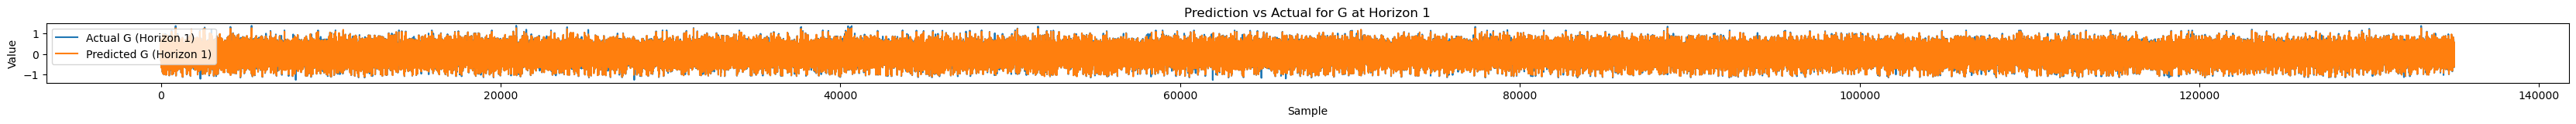

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import keras

def merge_csv_files(directory, Import_csv_file):
    # 存储所有DataFrame的列表
    df_list = []
    # 遍历目录
    # for filename in os.listdir(directory):
        # if filename.endswith('.csv'):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file == Import_csv_file:
                # 读取CSV文件
                df = pd.read_csv(os.path.join(root, file))
                df_list.append(df)

    # 合并所有DataFrame
    merged_df = pd.concat(df_list, ignore_index=True)
    return merged_df

# 使用函数
directory_path = './data'  # 指定目录路径
Import_csv_file = 'Importdata_4ms.csv'  # 合并后的Import CSV文件名
Exoport_csv_file = 'Exportdata_4ms.csv'  # 合并后的Import CSV文件名
Import_merged_data = merge_csv_files(directory_path, Import_csv_file)
Exoport_merged_data = merge_csv_files(directory_path, Exoport_csv_file)
merged_data = pd.merge(Import_merged_data, Exoport_merged_data, left_index=True, right_index=True)

# 获取表头
headers = merged_data.columns.tolist()

# # 选择输入和输出列
X = merged_data[headers[0:7]].values  # 输入列
y = merged_data[headers[13]].values #y = merged_data[headers[8:14]].values  # 输出列

# 归一化数据
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))#y_scaled = scaler_y.fit_transform(y)

# 将数据转换为LSTM所需的时间步格式
def create_dataset(X, y, time_step=5, forecast_horizon=1):
    X_data, y_data = [], []
    for i in range(len(X) - time_step - forecast_horizon + 1):
        X_data.append(X[i:(i + time_step)])  # 过去time_step个时间步的数据
        y_data.append(y[i + time_step:i + time_step + forecast_horizon])  # 预测未来forecast_horizon个时间步
    return np.array(X_data), np.array(y_data)

time_step = 5  # 输入时间步数
forecast_horizon = 1  # 预测1个未来时间步
X_data, y_data = create_dataset(X_scaled, y_scaled, time_step, forecast_horizon)

# 拆分数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42
)

# 创建LSTM模型
model = Sequential()
model.add(LSTM(
    units=100,
    return_sequences=False,
    input_shape=(time_step, X_train.shape[2])
))

# 创建LSTM模型
#model = Sequential()
#model.add(LSTM(
#    units=100,
#    return_sequences=True,
#    input_shape=(time_step, X_train.shape[2])
#))

# 第二层 LSTM，不返回序列（最终输出）
#model.add(LSTM(
#    units=64,
#    return_sequences=False
#))

# 输入形状调整：假设 X_train 的 shape 是 (样本数, time_step, 特征数)
#time_step = X_train.shape[1]
#feature_dim = X_train.shape[2]

# 模型结构
#model = Sequential()

# 使用 Input 层定义输入
#model.add(Input(shape=(time_step, feature_dim)))

# 第一层 LSTM
#model.add(LSTM(units=100, return_sequences=True))

# 第二层 LSTM
#model.add(LSTM(units=64, return_sequences=False))

# 输出层
model.add(Dense(units=forecast_horizon * 1))  # 输出多个时间步#model.add(Dense(units=forecast_horizon * 6))  # 输出多个时间步

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

model.compile(optimizer='adam', loss='mean_squared_error', metrics=METRICS)

# 训练模型并保存训练历史
history = model.fit(
    X_train,
    y_train.reshape(-1, forecast_horizon * 1),#6
    epochs=40,
    batch_size=64,
    validation_data=(X_test, y_test.reshape(-1, forecast_horizon * 1))#6
)

model.save('./predict_model.h5')

# 预测结果
y_pred = model.predict(X_test)

# 反归一化数据
# 由于y_pred和y_test有forecast_horizon * 6个特征，需要先重塑形状再进行反归一化
y_pred_reshaped = y_pred.reshape(-1, 1)  # (samples * forecast_horizon, 6)#6
y_test_reshaped = y_test.reshape(-1, 1)#6

y_pred_rescaled = scaler_y.inverse_transform(y_pred_reshaped).reshape(y_pred.shape[0], forecast_horizon,1)#6
y_test_rescaled = scaler_y.inverse_transform(y_test_reshaped).reshape(y_test.shape[0], forecast_horizon,1)#6

# 可视化结果
plt.figure(figsize=(42, 1))  # 增加宽度和高度以适应多个子图
feature_names = headers[13]#8-14

for i in range(forecast_horizon):
    for j in range(6):  # Iterate over each feature
        plt.subplot(forecast_horizon, 1, i * 1 + j + 1)#6
        plt.plot(y_test_rescaled[:, i, j], label=f'Actual {feature_names[j]} (Horizon {i+1})')
        plt.plot(y_pred_rescaled[:, i, j], label=f'Predicted {feature_names[j]} (Horizon {i+1})')
        plt.legend()
        plt.title(f'Prediction vs Actual for {feature_names[j]} at Horizon {i+1}')
        plt.xlabel('Sample')
        plt.ylabel('Value')

plt.tight_layout()
plt.show()

plt.figure(figsize=(4, 12))
def plot_metrics(history):
    metrics =  ['loss', 'auc', 'recall']
    for n, metric in enumerate(metrics):
        name = metric
        plt.subplot(3,1,n+1)
        plt.plot(history.epoch,  history.history[metric], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim()
        elif metric == 'auc':
            plt.ylim()
        else:
            plt.ylim()

        plt.legend()
plot_metrics(history)